In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import os

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Logistic Regression

## **Diabetes Prediction Model:**

In [7]:
# Load diabetes dataset
diabetes_df = pd.read_csv('/workspace/COMP-3608---PROJECT/data/feature_engineering/diabetes_feature_engineering')

In [8]:
# Display dataset info

print("Diabetes Dataset Info:")
print(diabetes_df.info())

print("\nFirst 5 rows:")
print(diabetes_df.head())

Diabetes Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   hba1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
 9   age_group            99089 non-null   object 
 10  bmi_category         100000 non-null  object 
 11  glucose_tolerance    100000 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB
None

First 5 rows:
   gender  age  hypertension  heart_disease smoking_history    bmi  \
0

In [9]:
# Prepare features and target
X = diabetes_df.drop('diabetes', axis=1)
y = diabetes_df['diabetes']

In [20]:
# Identify categorical and numerical columns
cat_cols = ['gender', 'smoking_history', 'age_group', 'bmi_category', 'glucose_tolerance']
num_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'hba1c_level', 'blood_glucose_level']


In [21]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

In [22]:
# Create and train logistic regression model
diabetes_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train model
diabetes_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease', 'bmi',
                                                   'hba1c_level',
                                                   'blood_glucose_level']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'smoking_history',
                                                   'age_group', 'bmi_category',
                                                   'glucose_tolerance'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [25]:
# Evaluate model
y_pred = diabetes_model.predict(X_test)

In [26]:
print("\nDiabetes Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Diabetes Model Evaluation:
Accuracy: 0.96525
Precision: 0.9392888117953165
Recall: 0.6340749414519906
F1 Score: 0.7570779447745544

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.63      0.76      1708

    accuracy                           0.97     20000
   macro avg       0.95      0.82      0.87     20000
weighted avg       0.96      0.97      0.96     20000



In [29]:
# Save model
joblib.dump(diabetes_model, '/workspace/COMP-3608---PROJECT/models/diabetes_logreg.pkl')
print("\nDiabetes model saved to models/diabetes_logreg.pkl")


Diabetes model saved to models/diabetes_logreg.pkl


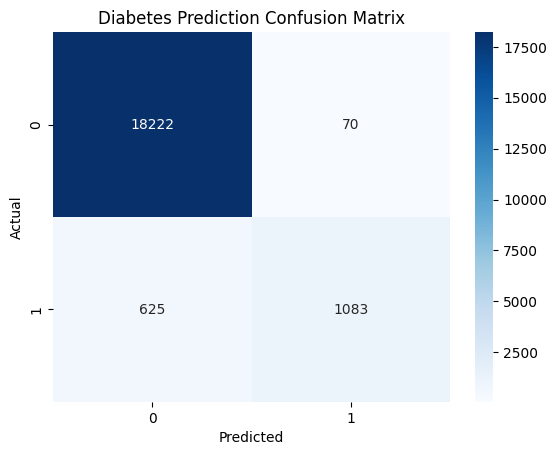

In [30]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Diabetes Prediction Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()